In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers")
import BayesianDecoding as bd
import sklearn as sk
import utilities as u
import preprocessing as pp
import behavior as b
import tensortools as tt
from nmftools import ensemble as ens
from nmftools import plots as plots
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
# load behavior and cells
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])


In [4]:
mouse = '4139219.3'

In [5]:
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse



,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
632,4139219.3,08_10_2018,3,TwoTower_noTimeout,63,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.3\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...
635,4139219.3,08_10_2018,5,TwoTower_noTimeout,55,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.3\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...
667,4139219.3,10_10_2018,2,TwoTower_noTimeout,100,1,CA1,2018-10-10,G:\My Drive\\VR_Data\TwoTower\4139219.3\10_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...
708,4139219.3,12_10_2018,2,TwoTower_Timeout,54,1,CA1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139219.3\12_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...
754,4139219.3,15_10_2018,2,TwoTower_Timeout,46,1,CA1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139219.3\15_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...
801,4139219.3,17_10_2018,2,TwoTower_Timeout,38,1,CA1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139219.3\17_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...
841,4139219.3,19_10_2018,2,TwoTower_Timeout,51,1,CA1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139219.3\19_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...
856,4139219.3,20_10_2018,1,TwoTower_Timeout,51,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
857,4139219.3,20_10_2018,2,TwoTower_Timeout,53,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
874,4139219.3,22_10_2018,1,TwoTower_Timeout,49,1,CA1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139219.3\22_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...


In [24]:
sess = df_mouse.iloc[3]
print(sess['data file'])
VRDat,C, S, A = pp.load_scan_sess(sess)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,speed=VRDat.speed._values)
#lick_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(VRDat.lick._values,VRDat.pos._values,tstart_inds,teleport_inds,speed=VRDat.speed._values)

G:\My Drive\\VR_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout_2.sqlite
G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_010.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_010.mat
G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_010_cnmf_results.mat
#refs#
#subsystem#
#subsystem#not made into numpy array
A
Anot made into numpy array
C
C_dec
F0
F_dff
S_dec
b
f
options
template
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [23]:
ca_dat = pp.load_ca_mat(sess['scanfile'])

G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_010_cnmf_results.mat
#refs#
#subsystem#
#subsystem#not made into numpy array
A
Anot made into numpy array
C
C_dec
F0
F_dff
S_dec
b
f
options
template


In [17]:
print(ca_dat['C'].dtype)

float64


C:\Users\mplitt\MightyMorphingPhotonRangers\behavior.py:107: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)


(<Figure size 1080x1080 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x20bfb645c18>,
  <matplotlib.axes._subplots.AxesSubplot at 0x20b80728d68>))

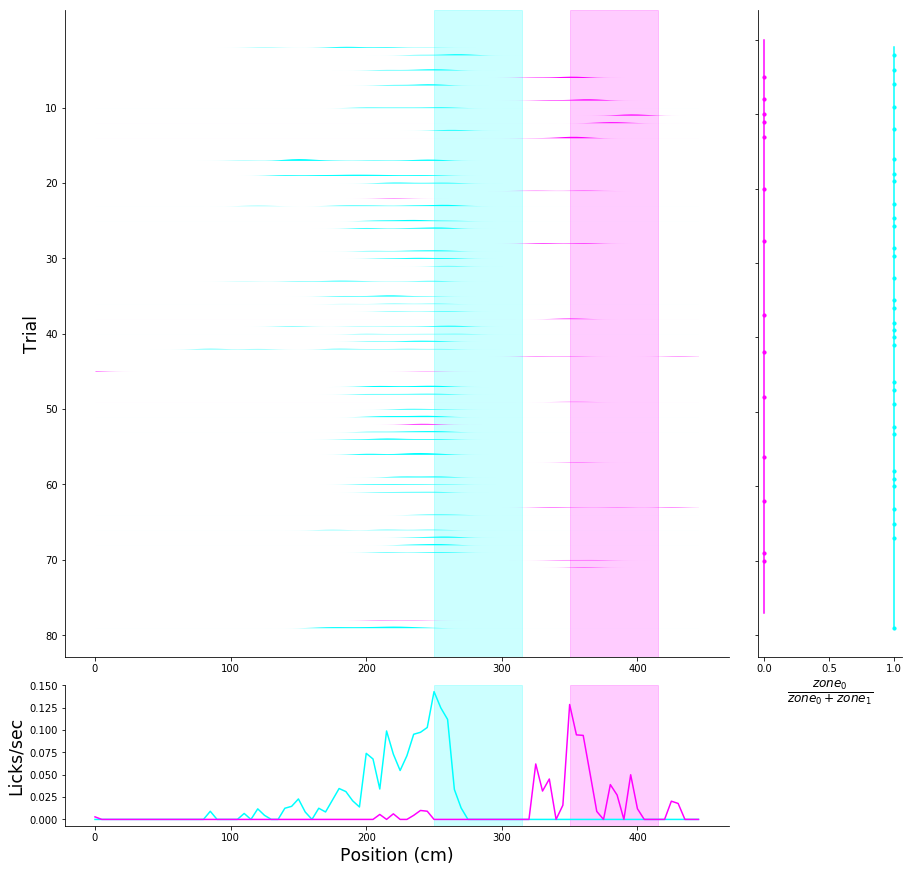

In [25]:
# licking behavior
lick_mat, occ, edges,centers= u.make_pos_bin_trial_matrices(VRDat['lick']._values,VRDat.pos._values,tstart_inds,teleport_inds)
lick_dict = u.trial_type_dict(lick_mat,trial_info['morphs'])
b.lick_plot(lick_dict,edges)

In [26]:
print(trial_info['rewards'])

[0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1.]


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B807CDB38>,
       dtype=object))

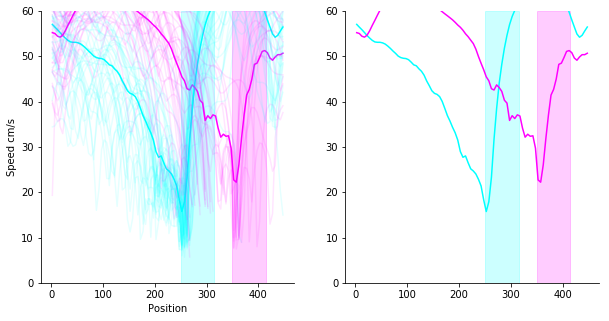

In [27]:
speed_mat, occ, edges,centers= u.make_pos_bin_trial_matrices(VRDat['speed']._values,VRDat.pos._values,tstart_inds,teleport_inds)
speed_dict = u.trial_type_dict(speed_mat,trial_info['morphs'])
b.plot_speed(centers,speed_dict,trial_info['morphs'])

In [17]:
mdl=tt.Ensemble(fit_method='ncp_hals',nonneg=True)
mdl.fit(C_trial_mat[:,:,:].T, ranks=range(1, 20), replicates=5)

Rank-1 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.2s


Rank-2 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 40.5s


Rank-3 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 29.0s


Rank-4 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 38.8s


Rank-5 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 39.6s


Rank-6 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 54.0s


Rank-7 models:  min obj, 0.83;  max obj, 0.84;  time to fit, 66.4s


Rank-8 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 67.5s


Rank-9 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 76.7s


Rank-10 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 75.9s


Rank-11 models:  min obj, 0.82;  max obj, 0.82;  time to fit, 70.6s


Rank-12 models:  min obj, 0.82;  max obj, 0.82;  time to fit, 75.3s


Rank-13 models:  min obj, 0.82;  max obj, 0.82;  time to fit, 86.5s


Rank-14 models:  min obj, 0.81;  max obj, 0.81;  time to fit, 86.1s


Rank-15 models:  min obj, 0.81;  max obj, 0.81;  time to fit, 72.8s


Rank-16 models:  min obj, 0.81;  max obj, 0.81;  time to fit, 69.8s


Rank-17 models:  min obj, 0.81;  max obj, 0.81;  time to fit, 85.1s


Rank-18 models:  min obj, 0.80;  max obj, 0.80;  time to fit, 88.5s


Rank-19 models:  min obj, 0.80;  max obj, 0.80;  time to fit, 82.3s


(0, 20)

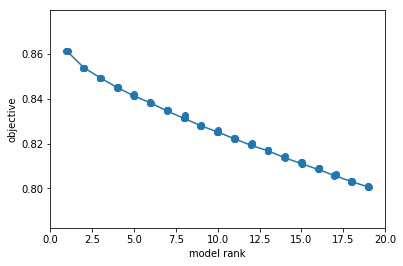

In [18]:
ax=tt.plot_objective(mdl)
ax.set_xlim([0,20])

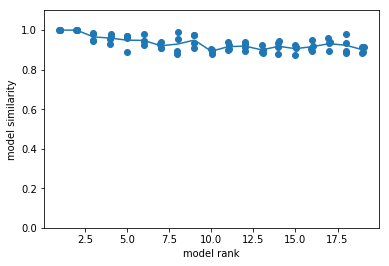

In [19]:
ax=tt.plot_similarity(mdl)
#ax.set_xlim([10,25])

In [21]:
best_mdl=19
# take rank 15 results, seems like parsimonious local minima
obj = mdl.objectives(best_mdl)
# get best model
mdl_hat = mdl.results[best_mdl][0]
# get factors from best model
U=mdl_hat.factors

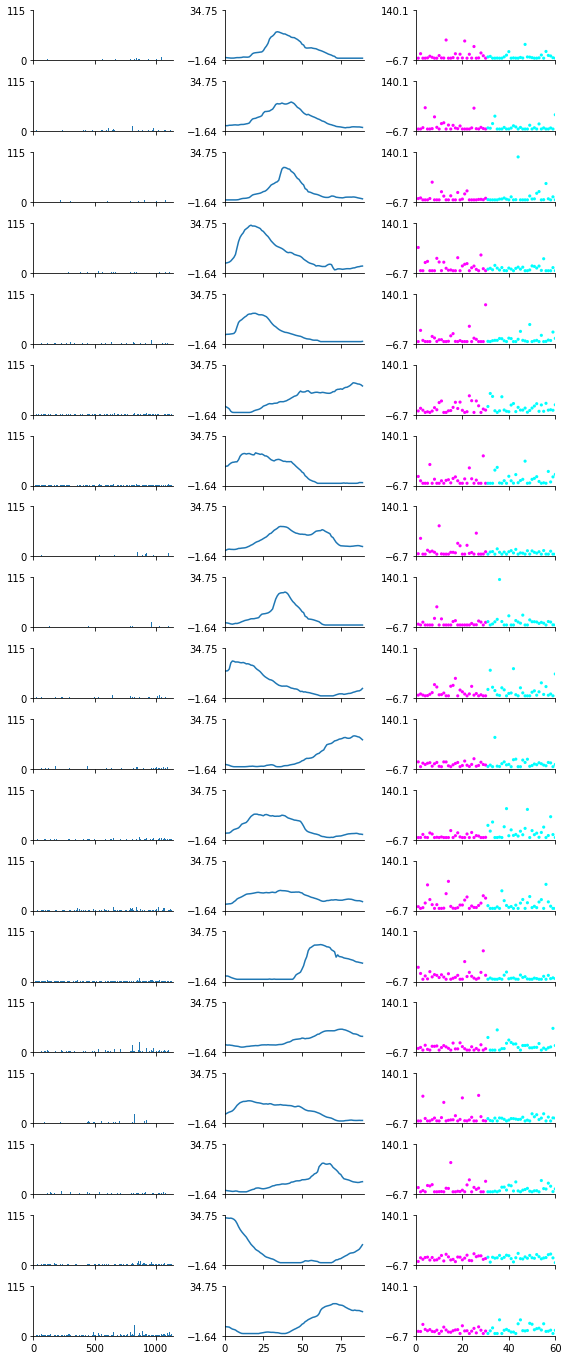

In [22]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],scatter_kw={'c':trial_info['morphs'],'cmap':'cool'})

In [ ]:
C_trial_Ncat = np.reshape(C_trial_mat,[C_trial_mat.shape[0],-1])
results = ens.fit_ensemble_masked(C_trial_Ncat,np.arange(1,10),n_replicates=5)




  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
0 3250.0522
1 3241.7842
2 3241.8008
3 3241.8113
4 3241.813
5 3241.813
6 3241.8135
7 3241.8135
8 3241.8132
9 3241.8132
10 3241.8132
11 3241.8132
12 3241.8132
13 3241.8132
14 3241.8132
15 3241.8132
16 3241.8132
17 3241.8132
18 3241.8132
19 3241.8132
20 3241.8132
21 3241.8132
22 3241.8132
23 3241.8132
24 3241.8132
25 3241.8132
26 3241.8132
27 3241.8132
28 3241.8132
29 3241.8132
30 3241.8132
31 3241.8132
32 3241.8132
33 3241.8132
34 3241.8132
35 3241.8132
36 3241.8132
37 3241.8132
38 3241.8132
39 3241.8132
40 3241.8132
41 3241.8132
42 3241.8132
43 3241.8132
44 3241.8132
45 3241.8132
46 3241.8132
47 3241.8132
48 3241.8132
49 3241.8132
replicate 1
0 3254.5894
1 3241.9995
2 3241.8108
3 3241.8113
4 3241.812
5 3241.8137
6 3241.8135
7 3241.8135
8 3241.8132
9 3241.8132
10 3241.8132
11 3241.8132
12 3241.8132
13 3241.8132
14 3241.8132
15 3241.8132
16 3241.8132
17 3241.8132
18 3241.8132
19 3241.8132
20 3241.8132
21 3241.8132
22 3241.8132
23 3241.8132
24 3241.8132
25 3241.8132
26 3241.813




 11%|████████▉                                                                       | 1/9 [35:34<4:44:33, 2134.23s/it]

replicate 0
0 3223.781
1 3176.1284
2 3165.1694
3 3164.716
4 3164.381
5 3164.0496
6 3163.6523
7 3162.877
8 3161.3928
9 3158.7063
10 3153.7969
11 3145.3374
12 3133.8772
13 3121.7712
14 3113.6985
15 3110.485
16 3110.2026
17 3110.8506
18 3111.1694
19 3111.4507
20 3111.688
21 3111.8694
22 3112.0078
23 3112.1194
24 3112.2026
25 3112.269
26 3112.3198
27 3112.3599
28 3112.3909
29 3112.414
30 3112.4316
31 3112.4465
32 3112.458
33 3112.4658
34 3112.4717
35 3112.4785
36 3112.4832
37 3112.4849
38 3112.4868
39 3112.4893
40 3112.4915
41 3112.4922
42 3112.493
43 3112.4932
44 3112.4934
45 3112.4941
46 3112.4944
47 3112.4946
48 3112.4944
49 3112.4946
replicate 1
0 3185.4246
1 3116.052
2 3112.7278
3 3113.512
4 3113.663
5 3113.5762
6 3113.4592
7 3113.2827
8 3113.1194
9 3112.978
10 3112.8652
11 3112.772
12 3112.6987
13 3112.6487
14 3112.6106
15 3112.5823
16 3112.5618
17 3112.5457
18 3112.534
19 3112.525
20 3112.5176
21 3112.5134
22 3112.5093
23 3112.5068
24 3112.504
25 3112.5017
26 3112.5005
27 3112.4988





 22%|█████████████████▎                                                            | 2/9 [1:38:49<5:07:08, 2632.63s/it]

replicate 0
0 3182.0625
1 3116.9246
2 3076.2954
3 3055.6125
4 3047.693
5 3043.9788
6 3041.781
7 3040.8286
8 3040.4607
9 3039.8188
10 3039.515
11 3039.4663
12 3039.4995
13 3039.608
14 3039.7957
15 3039.999
16 3040.2217
17 3040.436
18 3040.6409
19 3040.8396
20 3041.024
21 3041.195
22 3041.3464
23 3041.475
24 3041.5806
25 3041.6702
26 3041.7446
27 3041.8093
28 3041.8608
29 3041.9104
30 3041.9502
31 3041.9849
32 3042.0112
33 3042.031
34 3042.0474
35 3042.0605
36 3042.0715
37 3042.0798
38 3042.0833
39 3042.0837
40 3042.0833
41 3042.0835
42 3042.081
43 3042.0828
44 3042.085
45 3042.0842
46 3042.0837
47 3042.0854
48 3042.087
49 3042.0881
replicate 1
0 3174.578
1 3072.4998
2 3047.6636
3 3040.2034
4 3037.503
5 3036.9255
6 3037.3347
7 3037.991
8 3038.6106
9 3039.0825
10 3039.4646
11 3039.7937
12 3040.1
13 3040.4036
14 3040.68
15 3040.9216
16 3041.134
17 3041.3135
18 3041.4548
19 3041.5686
20 3041.6675
21 3041.745
22 3041.8098
23 3041.8635
24 3041.9104
25 3041.9514
26 3041.9856
27 3042.0103
28 30




 33%|██████████████████████████                                                    | 3/9 [2:46:31<5:06:07, 3061.30s/it]

replicate 0
0 3156.494
1 3023.493
2 2978.6284
3 2965.345
4 2960.613
5 2959.0874
6 2959.1094
7 2959.6926
8 2960.2974
9 2960.717
10 2961.0403
11 2961.2827
12 2961.4495
13 2961.5603
14 2961.6409
15 2961.707
16 2961.775
17 2961.8376
18 2961.8792
19 2961.9111
20 2961.942
21 2961.973
22 2961.9998
23 2962.014
24 2962.0232
25 2962.0317
26 2962.04
27 2962.0469
28 2962.0562
29 2962.0615
30 2962.0596
31 2962.053
32 2962.0447
33 2962.0396
34 2962.0386
35 2962.0393
36 2962.0427
37 2962.0496
38 2962.0588
39 2962.0698
40 2962.084
41 2962.0986
42 2962.0918
43 2962.082
44 2962.0747
45 2962.0732
46 2962.0747
47 2962.0803
48 2962.0881
49 2962.0984
replicate 1
0 3142.2356
1 3016.7822
2 2980.9644
3 2968.234
4 2962.3508
5 2959.1182
6 2957.328
7 2956.3494
8 2955.7646
9 2955.4258
10 2955.3337
11 2955.6426
12 2956.3557
13 2957.3296
14 2958.5625
15 2959.786
16 2960.5598
17 2961.0166
18 2961.3137
19 2961.5217
20 2961.671
21 2961.7732
22 2961.858
23 2961.926
24 2961.9785
25 2962.0254
26 2962.0542
27 2962.075
28 2

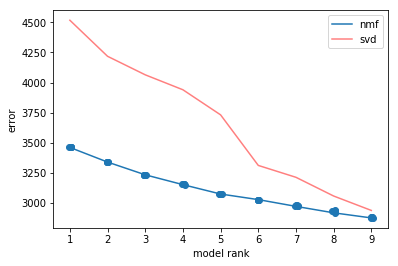

In [17]:
plots.plot_rmse(results)

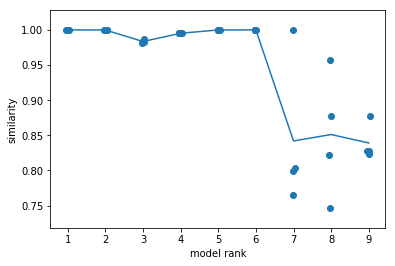

In [18]:
plots.plot_similarity(results)

In [19]:
rank = 6

In [20]:
U,Vt = results[rank]['factors'][0][0],results[rank]['factors'][0][1]

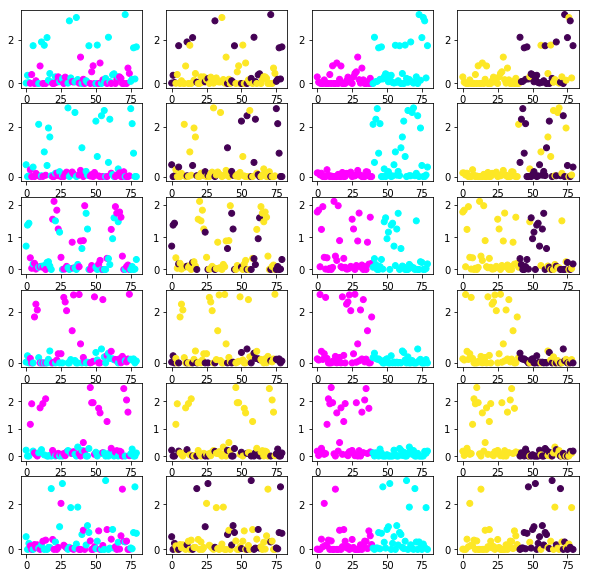

In [21]:
f,ax = plt.subplots(U.shape[1],4,figsize=[10,10])
# ff,aax = plt.subplots(U.shape[1],1,figsize=[5,10])
ntrials = trial_info['morphs'].shape[0]
sort = np.argsort(trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter'])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(ntrials),U[:,factor],c=1-trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(ntrials),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    ax[factor,2].scatter(np.arange(ntrials),U[sort,factor],c=1-trial_info['morphs'][sort],cmap='cool')
    ax[factor,3].scatter(np.arange(ntrials),U[sort,factor],c=trial_info['rewards'][sort]+2*trial_info['omissions'][sort],cmap='viridis')

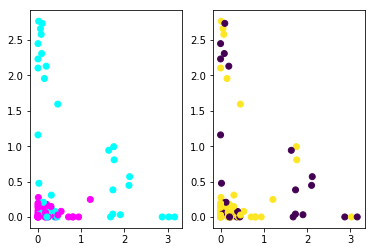

In [22]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[:,0],U[:,1],c=1-trial_info['morphs'],cmap='cool')
ax[1].scatter(U[:,0],U[:,1],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')

0.0 81030.98725852993


C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan nan


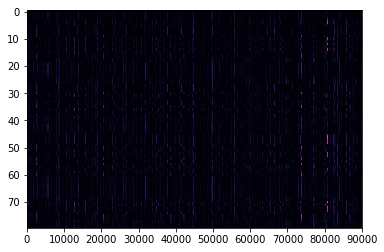

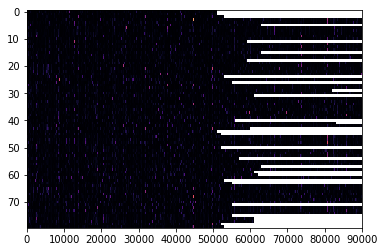

In [23]:
f,ax = plt.subplots()

ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

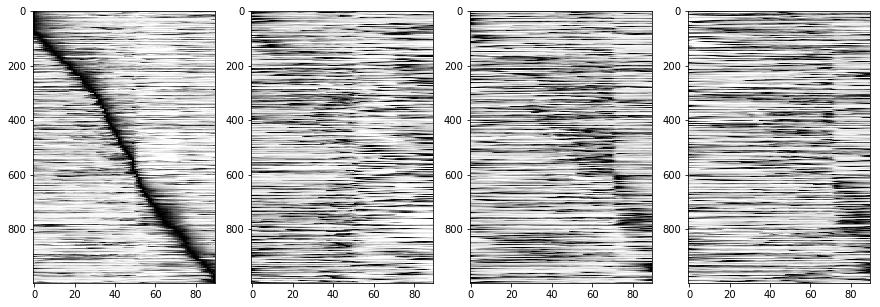

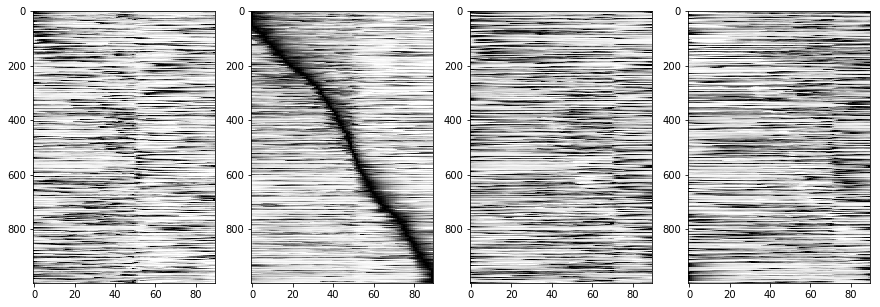

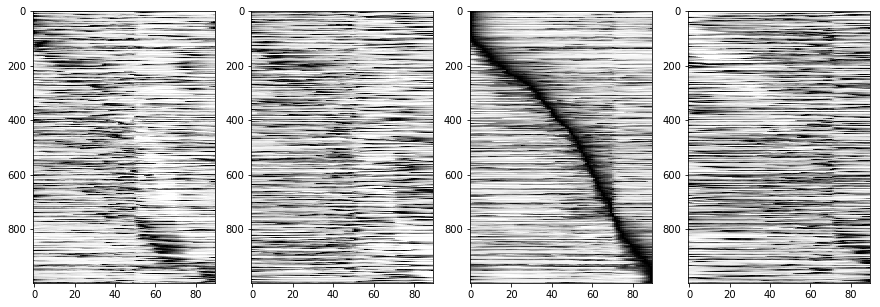

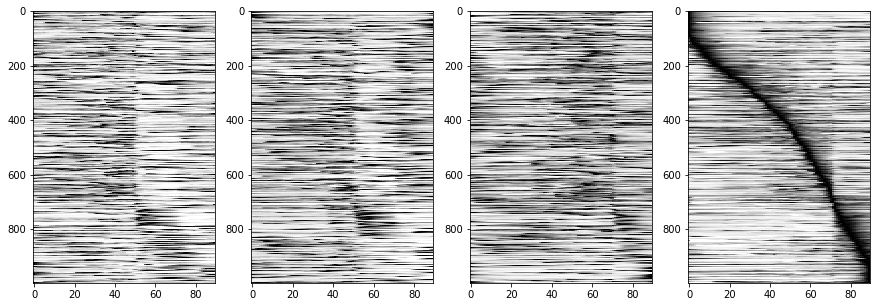

In [21]:
Vmat = np.reshape(Vt,[rank,C_trial_mat.shape[1],C_trial_mat.shape[2]])
getSort = lambda fr : np.argsort(np.argmax(fr,axis=0))
#factorOrder = [0,1,3,2,4]
for k in range(rank):
    fr_k = np.squeeze(Vmat[k,:,:])
    for col in range(fr_k.shape[1]):
        fr_k[:,col]/=fr_k[:,col].max()
    f,ax = plt.subplots(1,rank,figsize=[15,5])
    sort = getSort(fr_k)
    for j in range(rank):
        fr_j = np.squeeze(Vmat[j,:,:])
        for col in range(fr_j.shape[1]):
            fr_j[:,col]/=fr_j[:,col].max()
            
        ax[j].imshow(fr_j[:,sort].T,cmap='Greys',aspect='auto')

In [ ]:
# lick triggered
